# EDA for Marks engineering employees project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
base_df = pd.read_excel("../data/raw_data.xlsx", sheet_name="БАза")

/home/usr/miniforge3/envs/Marks/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
base_df.head()

,Номер,Стаж,Возраст,Остатки отпусков по основному месту работы / внешний совместитель (осн. Место не в группе компаний),Дата увольнения,Примечание,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,Количество изменений,Факт повышения,% повышения,Оценка 360 градусов,Оценка 360 градусов (интерпритация данных),NPS,Критичные,Потенциал,"Востребованность \n1 - высокая, 0 - низкая",Высокая корп. интеграция\n1 - да,Обучение анг.яз,BIM лидер,Рекомендательный рекрутинг 1,Рекомендательный рекрутинг 2,Рекомендательный рекрутинг 3,HH,HH коммент,"ФАКТ переведенный на 8 часов, май","Выход в выходной, май","ФАКТ, май","К-т переработки, май",000000085,000000363,БП-БП-377,000000105,000000378,000000359,000000369,000000312,000000009,000000203,БП-БП-572,000000372,000000298,000000151,000000373,000000371,000000370,БП-БП-402,000000211,000000026,000000297,БП-БП-399,000000025,000000383,БП-БП-407,000000329,000000328,000000323,БП-БП-405,БП-БП-323,000000391,БП-БП-328,000000331,000000334,000000392,БП-БП-541,БП-БП-532,000000106,000000394,БП-БП-542,000000361,000000396,БП-БП-331,000000395,000000343,БП-БП-330,000000354,БП-БП-329,000000197,000000355,000000005,000000358,000000353,БП-БП-394,БП-БП-361,000000238,БП-БП-341,БП-БП-339,000000176,000000064,БП-БП-396,БП-БП-388,БП-БП-403,БП-БП-401,000000071,БП-БП-383,000000113,БП-БП-469,БП-БП-470,000000059,БП-БП-539,000000038,000000098,NaN,000000159,000000002,000000232,000000295,000000308,000000321,000000322,000000341,000000357,000000366,000000375,000000387,000000388,000000393,БП-БП-362,БП-БП-365,БП-БП-368,БП-БП-387,БП-БП-392,БП-БП-391,БП-БП-395,БП-БП-398,БП-БП-381,000000052,000000168,000000227,000000330,000000380,000000379,000000152,000000145,000000142,000000245,000000216,000000338,000000090,000000374,000000129,БП-БП-360,000000045,БП-БП-369,БП-БП-370,БП-БП-371,БП-БП-375,БП-БП-374,000000068,000000243,000000013,БП-БП-417,БП-БП-373,000000253,000000349,Внепроектное совещание,БП-БП-372,БП-БП-416,БП-БП-393,БП-БП-414,БП-БП-412,БП-БП-389,000000356,БП-БП-415,000000350,БП-БП-357,БП-БП-411,000000225,000000365,БП-БП-386,БП-БП-380,БП-БП-326,БП-БП-385,Образовательная деятельность,ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ,Поручение непосредственного руководителя,000000313,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ,000000207,РАБОТЫ БЕЗ ДОГОВОРА,000000039,БП-БП-342,000000215,БП-БП-363,000000030,БП-БП-366,БП-БП-467,БП-БП-410,БП-БП-322,Количество проектов май,"ФАКТ переведенный на 8 часов, июнь","Выход в выходной, июнь","ФАКТ, июнь","К-т переработки, июнь",000000085.1,000000363.1,БП-БП-377.1,000000105.1,000000378.1,000000359.1,000000369.1,000000312.1,000000009.1,000000203.1,БП-БП-572.1,000000372.1,000000298.1,000000151.1,000000373.1,000000371.1,000000370.1,БП-БП-402.1,000000211.1,000000026.1,000000297.1,БП-БП-399.1,000000025.1,000000383.1,БП-БП-407.1,000000329.1,000000323.1,БП-БП-405.1,000000391.1,БП-БП-328.1,000000331.1,000000334.1,000000392.1,БП-БП-541.1,БП-БП-532.1,000000106.1,000000394.1,nan.1,nan.2,nan.3,000000361.1,nan.4,000000396.1,БП-БП-331.1,000000395.1,000000343.1,БП-БП-330.1,nan.5,000000354.1,БП-БП-329.1,000000197.1,000000355.1,000000005.1,000000353.1,БП-БП-394.1,БП-БП-361.1,000000238.1,БП-БП-341.1,БП-БП-339.1,000000176.1,000000064.1,nan.6,БП-БП-396.1,БП-БП-388.1,БП-БП-403.1,БП-БП-401.1,nan.7,БП-БП-383.1,000000113.1,БП-БП-469.1,БП-БП-470.1,nan.8,nan.9,000000059.1,БП-БП-539.1,nan.10,nan.11,000000038.1,000000098.1,000000002.1,000000295.1,000000308.1,000000321.1,000000322.1,000000341.1,000000357.1,000000366.1,000000375.1,000000388.1,000000393.1,БП-БП-362.1,БП-БП-365.1,БП-БП-368.1,БП-БП-387.1,БП-БП-392.1,БП-БП-391.1,БП-БП-395.1,БП-БП-398.1,БП-БП-381.1,000000052.1,nan.12,000000227.1,000000330.1,000000380.1,000000379.1,000000152.1,000000145.1,000000142.1,nan.13,nan.14,000000216.1,000000090.1,БП-БП-360.1,000000045.1,БП-БП-370.1,БП-БП-375.1,БП-БП-374.1,БП-БП-373.1,000000253.1,000000349.1,Внепроектное совещание.1,БП-БП-372.1,БП-БП-416.1,БП-БП-393.1,Б

In [5]:
# removing irrelevant service columns
base_df = base_df.loc[:, ~base_df.columns.str.startswith("0").fillna(False)]
base_df = base_df.loc[:, ~base_df.columns.str.startswith("БП").fillna(False)]
base_df = base_df.loc[:, ~base_df.columns.str.startswith("nan").fillna(False)]
base_df = base_df[base_df.columns.dropna()]

In [6]:
base_df.rename(
    columns={
        "Остатки отпусков по основному месту работы / внешний совместитель (осн. Место не в группе компаний)": "Остатки отпусков",
        "Востребованность \n1 - высокая, 0 - низкая": "Востребован",
        "Высокая корп. интеграция\n1 - да": "Интегрирован",
        "Дата увольнения": "Уволен"
    },
    inplace=True
)

In [7]:
base_df.to_csv("../data/base.csv")

In [8]:
base_df.head()

,Номер,Стаж,Возраст,Остатки отпусков,Уволен,Примечание,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,Количество изменений,Факт повышения,% повышения,Оценка 360 градусов,Оценка 360 градусов (интерпритация данных),NPS,Критичные,Потенциал,Востребован,Интегрирован,Обучение анг.яз,BIM лидер,Рекомендательный рекрутинг 1,Рекомендательный рекрутинг 2,Рекомендательный рекрутинг 3,HH,HH коммент,"ФАКТ переведенный на 8 часов, май","Выход в выходной, май","ФАКТ, май","К-т переработки, май",Внепроектное совещание,Образовательная деятельность,ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ,Поручение непосредственного руководителя,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ,РАБОТЫ БЕЗ ДОГОВОРА,Количество проектов май,"ФАКТ переведенный на 8 часов, июнь","Выход в выходной, июнь","ФАКТ, июнь","К-т переработки, июнь",Внепроектное совещание.1,Образовательная деятельность.1,ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.1,Поручение непосредственного руководителя.1,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ.1,РАБОТЫ БЕЗ ДОГОВОРА.1,Количество проектов июнь,"ФАКТ переведенный на 8 часов, июль","Выход в выходной, июль","ФАКТ, июль","К-т переработки, июль",Внепроектное совещание.2,Образовательная деятельность.2,ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.2,Поручение непосредственного руководителя.2,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ.2,РАБОТЫ БЕЗ ДОГОВОРА.2,Количество проектов июль,"ФАКТ переведенный на 8 часов, август","Выход в выходной, август","ФАКТ, август","К-т переработки, август",ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.3,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ.3,ТЕНДЕРНАЯ РАБОТА,Количество проектов август,"ФАКТ переведенный на 8 часов, сентябрь","Выход в выходной, сентябрь","ФАКТ, сентябрь","К-т переработки, сентябрь",ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.4,Количество проектов сентябрь
0,ID00000051,16.727778,39.219444,121.00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,3.788,высокие,0.575,0,1.0,1.0,1.0,NaT,NaN,NaN,NaN,NaN,0.0,0,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.2,0.0,166.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.4,0.0,202.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.2,0.0,99.2,1.0,0.0,0.0,0.0,0.0,188.8,0.0,188.8,1.0,0.0,0.0
1,ID00001319,2.002778,56.813889,0.00,2024-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000,NaN,0.000,0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0.0,0,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,184.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,0.0,176.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,1.0,0.0,0.0
2,ID00000054,10.858333,39.688889,174.31,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,3.887,высокие,0.605,0,0.0,NaN,1.0,NaT,NaN,NaN,NaN,NaN,0.0,0,208.0,0.0,208.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.6,0.0,196.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239.2,0.0,239.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,387.2,0.0,387.2,1.0,0.0,0.0,0.0,0.0,281.6,0.0,281.6,1.0,0.0,0.0
3,ID00000049,6.427778,40.797222,7.33,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,+,0.0,0.0,0.315789,2.706,средние,-0.349,да,0.0,1.0,1.0,NaT,NaN,NaN,NaN,NaN,0.0,0,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,184.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,0.0,132.0,1.0,0.0,0.0,0.0,0.0,144.0,0.0,144.0,1.0,0.0,0.0
4,ID00000055,11.491667,33.972222,5.33,NaT,NaN,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.184211,3.409,средние,0.282,0,1.0,1.0,1.0,NaT,NaN,NaN,NaN,NaN,0.0,0,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,184.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.0,0.0,152.0,1.0,0.0,0.0,0.0,0.0,168.0,0.0,168.0,1.0,0.0,0.0


In [9]:
base_df.shape

(1263, 79)

In [10]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 79 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Номер                                       1262 non-null   object        
 1   Стаж                                        1257 non-null   float64       
 2   Возраст                                     1262 non-null   float64       
 3   Остатки отпусков                            1262 non-null   float64       
 4   Уволен                                      68 non-null     datetime64[ns]
 5   Примечание                                  28 non-null     object        
 6   2024-01-01 00:00:00                         90 non-null     object        
 7   2024-02-01 00:00:00                         91 non-null     object        
 8   2024-03-01 00:00:00                         97 non-null     object        
 9   2024-04-

In [11]:
base_df.nunique()

Номер                                         1262
Стаж                                           634
Возраст                                       1193
Остатки отпусков                               185
Уволен                                          49
Примечание                                       2
2024-01-01 00:00:00                              1
2024-02-01 00:00:00                              1
2024-03-01 00:00:00                              1
2024-04-01 00:00:00                              1
2024-05-01 00:00:00                              1
2024-06-01 00:00:00                              1
2024-07-01 00:00:00                              1
2024-08-01 00:00:00                              1
2024-09-01 00:00:00                              1
Количество изменений                             5
Факт повышения                                   2
% повышения                                    124
Оценка 360 градусов                            445
Оценка 360 градусов (интерприта

In [12]:
# separating categorical and numerical cols
id_col = "Номер"
numerical_cols = base_df.select_dtypes(include="number").columns.to_list()
categorical_cols = (
    base_df.loc[:, base_df.columns != id_col]
    .select_dtypes(exclude="number")
    .columns.to_list()
)

In [13]:
categorical_cols

['Уволен',
 'Примечание',
 datetime.datetime(2024, 1, 1, 0, 0),
 datetime.datetime(2024, 2, 1, 0, 0),
 datetime.datetime(2024, 3, 1, 0, 0),
 datetime.datetime(2024, 4, 1, 0, 0),
 datetime.datetime(2024, 5, 1, 0, 0),
 datetime.datetime(2024, 6, 1, 0, 0),
 datetime.datetime(2024, 7, 1, 0, 0),
 datetime.datetime(2024, 8, 1, 0, 0),
 datetime.datetime(2024, 9, 1, 0, 0),
 'Оценка 360 градусов (интерпритация данных)',
 'Критичные',
 'Обучение анг.яз',
 'Рекомендательный рекрутинг 1',
 'Рекомендательный рекрутинг 2',
 'Рекомендательный рекрутинг 3',
 'HH коммент']

In [14]:
base_df.isnull().sum()

Номер                                            1
Стаж                                             6
Возраст                                          1
Остатки отпусков                                 1
Уволен                                        1195
Примечание                                    1235
2024-01-01 00:00:00                           1173
2024-02-01 00:00:00                           1172
2024-03-01 00:00:00                           1166
2024-04-01 00:00:00                           1147
2024-05-01 00:00:00                           1127
2024-06-01 00:00:00                           1199
2024-07-01 00:00:00                           1109
2024-08-01 00:00:00                           1161
2024-09-01 00:00:00                           1144
Количество изменений                             1
Факт повышения                                   1
% повышения                                      1
Оценка 360 градусов                              1
Оценка 360 градусов (интерприта

In [15]:
bool_cols = ["Уволен", "Обучение анг.яз", "Критичные", "Потенциал", "Востребован", "Интегрирован", "Обучение анг.яз", "BIM лидер", "HH"]
base_df[bool_cols] = base_df[bool_cols].isnull().values
base_df["Уволен"] = ~base_df["Уволен"]

In [20]:
base_df.head()

,Номер,Стаж,Возраст,Остатки отпусков,Уволен,Примечание,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,Количество изменений,Факт повышения,% повышения,Оценка 360 градусов,Оценка 360 градусов (интерпритация данных),NPS,Критичные,Потенциал,Востребован,Интегрирован,Обучение анг.яз,BIM лидер,Рекомендательный рекрутинг 1,Рекомендательный рекрутинг 2,Рекомендательный рекрутинг 3,HH,HH коммент,"ФАКТ переведенный на 8 часов, май","Выход в выходной, май","ФАКТ, май","К-т переработки, май",Внепроектное совещание,Образовательная деятельность,ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ,Поручение непосредственного руководителя,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ,РАБОТЫ БЕЗ ДОГОВОРА,Количество проектов май,"ФАКТ переведенный на 8 часов, июнь","Выход в выходной, июнь","ФАКТ, июнь","К-т переработки, июнь",Внепроектное совещание.1,Образовательная деятельность.1,ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.1,Поручение непосредственного руководителя.1,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ.1,РАБОТЫ БЕЗ ДОГОВОРА.1,Количество проектов июнь,"ФАКТ переведенный на 8 часов, июль","Выход в выходной, июль","ФАКТ, июль","К-т переработки, июль",Внепроектное совещание.2,Образовательная деятельность.2,ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.2,Поручение непосредственного руководителя.2,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ.2,РАБОТЫ БЕЗ ДОГОВОРА.2,Количество проектов июль,"ФАКТ переведенный на 8 часов, август","Выход в выходной, август","ФАКТ, август","К-т переработки, август",ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.3,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ.3,ТЕНДЕРНАЯ РАБОТА,Количество проектов август,"ФАКТ переведенный на 8 часов, сентябрь","Выход в выходной, сентябрь","ФАКТ, сентябрь","К-т переработки, сентябрь",ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.4,Количество проектов сентябрь
0,ID00000051,16.727778,39.219444,121.00,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,3.788,высокие,0.575,False,False,False,False,True,True,NaN,NaN,NaN,False,0,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.2,0.0,166.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.4,0.0,202.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.2,0.0,99.2,1.0,0.0,0.0,0.0,0.0,188.8,0.0,188.8,1.0,0.0,0.0
1,ID00001319,2.002778,56.813889,0.00,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000,NaN,0.000,False,False,True,True,True,True,NaN,NaN,NaN,False,0,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,184.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,0.0,176.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,1.0,0.0,0.0
2,ID00000054,10.858333,39.688889,174.31,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,3.887,высокие,0.605,False,False,True,False,True,True,NaN,NaN,NaN,False,0,208.0,0.0,208.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.6,0.0,196.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239.2,0.0,239.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,387.2,0.0,387.2,1.0,0.0,0.0,0.0,0.0,281.6,0.0,281.6,1.0,0.0,0.0
3,ID00000049,6.427778,40.797222,7.33,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,+,0.0,0.0,0.315789,2.706,средние,-0.349,False,False,False,False,True,True,NaN,NaN,NaN,False,0,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,184.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,0.0,132.0,1.0,0.0,0.0,0.0,0.0,144.0,0.0,144.0,1.0,0.0,0.0
4,ID00000055,11.491667,33.972222,5.33,False,NaN,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.184211,3.409,средние,0.282,False,False,False,False,True,True,NaN,NaN,NaN,False,0,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,184.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.0,0.0,152.0,1.0,0.0,0.0,0.0,0.0,168.0,0.0,168.0,1.0,0.0,0.0


In [17]:
base_df.isnull().sum()

Номер                                            1
Стаж                                             6
Возраст                                          1
Остатки отпусков                                 1
Уволен                                           0
Примечание                                    1235
2024-01-01 00:00:00                           1173
2024-02-01 00:00:00                           1172
2024-03-01 00:00:00                           1166
2024-04-01 00:00:00                           1147
2024-05-01 00:00:00                           1127
2024-06-01 00:00:00                           1199
2024-07-01 00:00:00                           1109
2024-08-01 00:00:00                           1161
2024-09-01 00:00:00                           1144
Количество изменений                             1
Факт повышения                                   1
% повышения                                      1
Оценка 360 градусов                              1
Оценка 360 градусов (интерприта

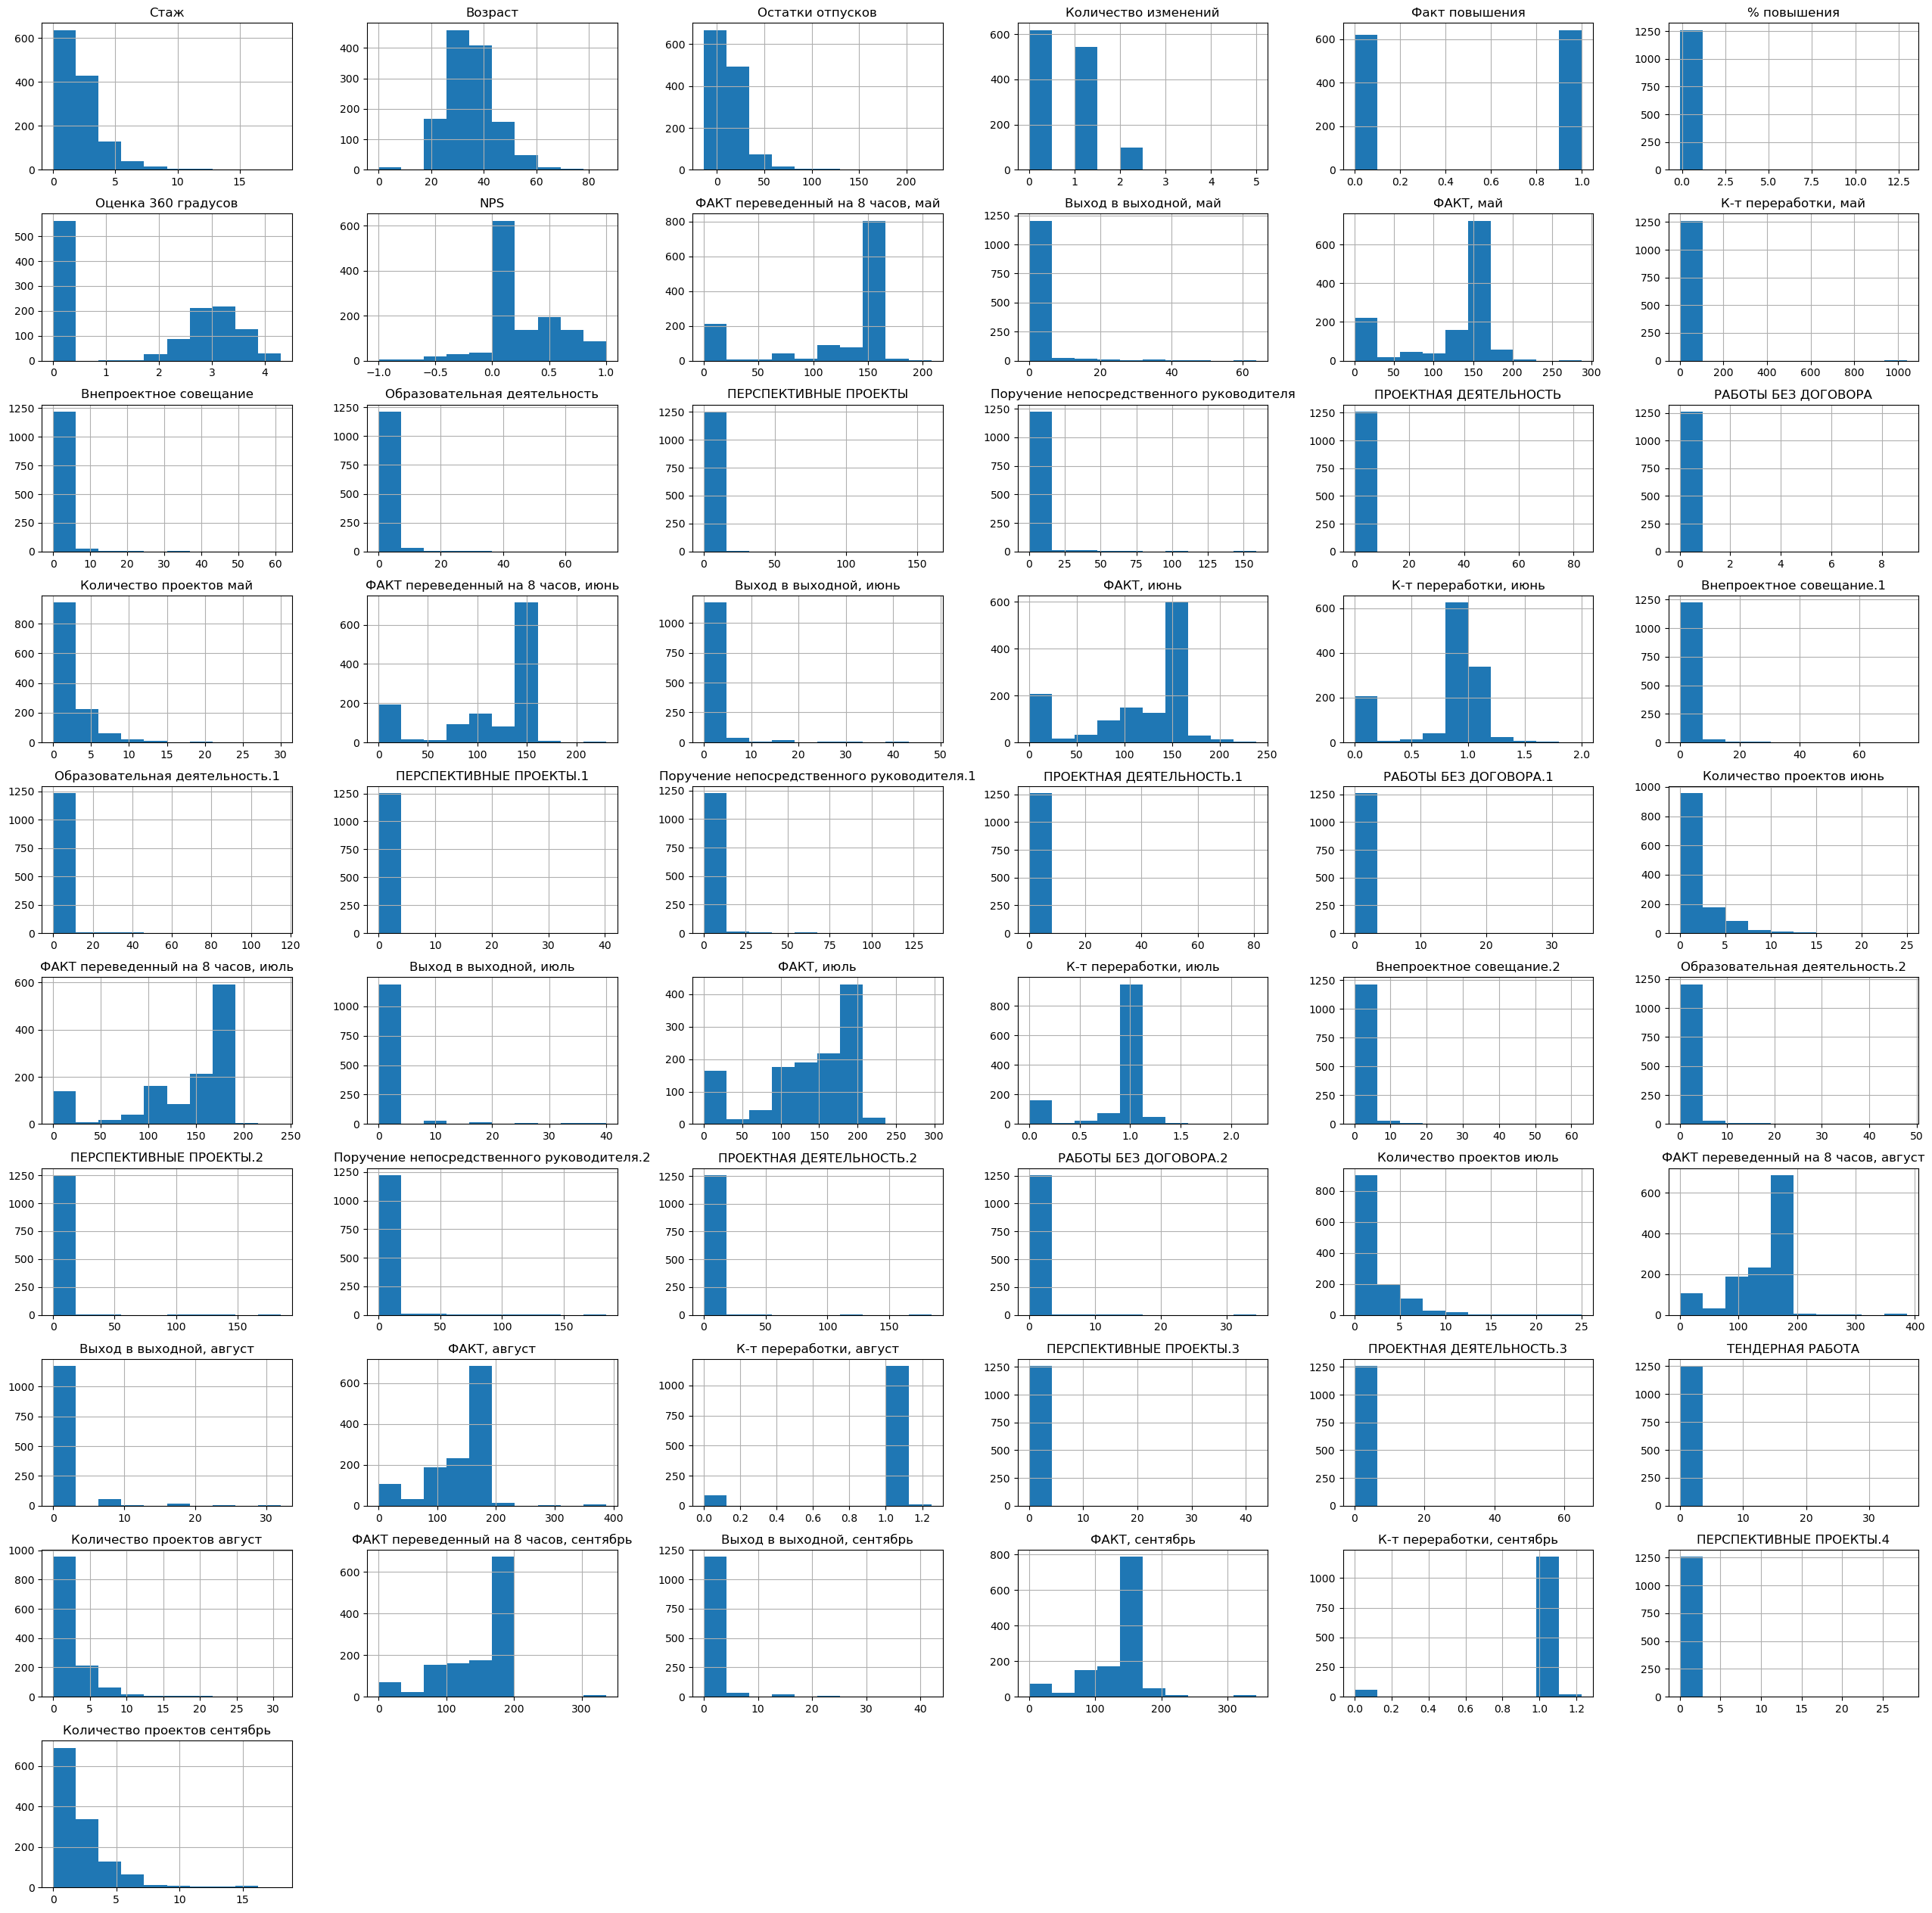

In [18]:
base_df[numerical_cols].hist(layout=(10, 6), figsize=(32, 32))
None